# Aprendizagem supervisionada

In [1]:
import matplotlib.pyplot as plt
import mglearn

/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


O aprendizado supervisionado é usado sempre que queremos prever um determinado
resultado a partir de um determinado input e temos exemplos de pares de inputs
 e outputs.
 
 Existem duas principais formas de aprendizagem supervisionada,
 a **classificação** e a **regressão**. Na classificação o objetivo é prever
 uma determinada classe, sendo que essa classe é uma opção dentre um conjunto
 de classes supervisionadas, por exemplo, prever se uma flor é da esécie A o B
 de acordo com as suas características. A classificação pode ser binária
 (duas classes; exemplo: sim ou não) ou multiclasses (quando existem mais
 de duas classes).
 
 No que diz respeito à regressão, o objetivo é prever um número contínuo
 em termos de programação. Um exemplo desse exercício seria prever a renda
 anual de uma pessoa de acordo com suas informações sobre educação,
 idade e condições de moradia.

#### Algorítimos de machine learning supervisionados

Para demonstrar os algorítimos de regressão, vamos usar três bases de dados. A primeira é a base *wave*
que possui apenas um único input de características e uma variável resposta contínua.

O gráfico abaixo representa a base de dados com a variável resposta em y e os inputs em x.
A cor verde representa a característica 0 e a cor vermelha mostra a característica 1:

In [2]:
X, y = mglearn.datasets.make_forge()

plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
print("X.shape: %s" % (X.shape,))

/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


#### Algorítimo K-vizinhos mais próximos
Nesse algorítiom, a construção do modelo consiste apenas em armazenar o conjunto de dados
de treinamento. Para fazer uma previsão para um novo ponto de dados, o algoritmo localiza
os pontos de dados mais próximos no conjunto de dados de treinamento, os “vizinhos mais próximos”.

#### Classificação de k-vizinhos
Esse estagio consiste em atribuir a quantidade de vizinhos utilizada no modelo.
O gráfico abaixo mostra a descrição do modelo com um único vizinho.

/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


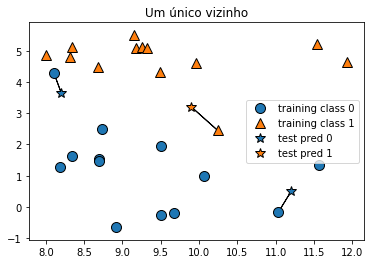

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.title("Um único vizinho");

Para cada um dos pontos adicionados, marcamos o ponto mais próximo no conjunto de treinamento.
A previsão do algoritmo de um vizinho mais próximo é o rótulo desse ponto (estrela).

O gráfico abaixo demonstra o funcionamento do algorítimo com k = 3 vizinhos:

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Agora vamos ver como podemos aplicar o algorítimo knn usando *skit learning*.

Primeiro, dividimos nossos dados em um treinamento e um conjunto de testes, utilizando a
função train_test_split, para que possamos avaliar o desempenho da generalização.



Primeiro vamos importar a função 

In [5]:
from sklearn.model_selection import train_test_split

Agoram vamos abrir a base de dados

In [6]:
X, y = mglearn.datasets.make_forge()

/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Agora criamos a base de teste e treino:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

No próximo passo vamos classificar a quantidade de vizinhos utilizada, por meio da função
KNeighborsClassifier

Importando a função:

In [8]:
from sklearn.neighbors import KNeighborsClassifier

Aplicando a classificação

In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Agora vamos ajustar o classificador usando o conjunto de treinamento. Usar a função
KNeighborsClassifier significa armazenar o conjunto de dados, para que possamos calcular
os vizinhos durante a previsão.

In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', 
                     metric_params=None, n_jobs=1, n_neighbors=3, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                     weights='uniform')

Agora vamos calcular os vizinhos mais próximos no conjunto de treinamento
e encontrar a classe mais comum entre estes.

In [11]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

Agora vamos usar o método de score para avaliar o quão boa a nossa previsão é.

In [12]:
clf.score(X_test, y_test)

0.8571428571428571

O que indica que em média o modelo acerta 56% das predições realizadas.

## Analisando a quantidade de vizinhos

Podemos representar graficamente o limite de classificação do algorítimo de acordo com
a quantidade de vizinhos escolhida, ou seja, podemos ver como o algorítimo classifica
os valores dentre as classes existentes a medida que adisionamos um vizinho a mais.

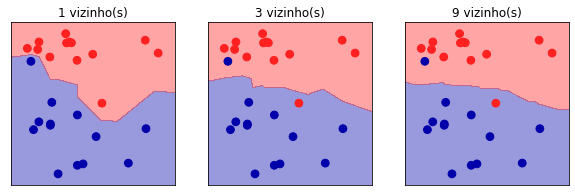

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%d vizinho(s)" % n_neighbors)
    

A Figura demonstra que com apenas um vizinho, o limite de decisão segue detalhadamente
a a classificação da base de treinamento.

#### Uma outra aplicação

Vamos utilizar uma base de dados sobre câncer para verificar a conexão entre complexidade
e generalização do modelo
    

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Vamos organizar o primeiro passo que é a criação da base de teste e treinamento

In [15]:
 X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)


training_accuracy = []
test_accuracy = []

Vamos aplicar vizinhos desde 1 até 10

In [16]:
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
#Construindo o modelo
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
# Precisão e acurácia
    training_accuracy.append(clf.score(X_train, y_train))
#precisão generalizada
    test_accuracy.append(clf.score(X_test, y_test))

Inserindo os gráficos

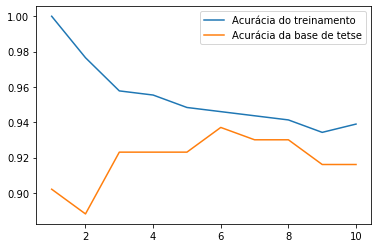

In [17]:
plt.plot(neighbors_settings, training_accuracy, label="Acurácia do treinamento")
plt.plot(neighbors_settings, test_accuracy, label="Acurácia da base de tetse")
plt.legend()

    

O gráfico demonstra que a predição na base de treinamento com apenas um vizinho é perfeita
e vai se reduzindo conforma aumantamos a quantidade de vizinhos.
    
    

## REGRESSÃO KNN

Podemos usar o algorítimo Knn para fazer previsões por meio de modelos supervisionados de
regressão. Se utilizarmos um único vizinho, a nossa previsão será equivalente ao valor
atribuído ao vizinho mais próximo para o ponto de referência, conforme demonstrado a seguir:

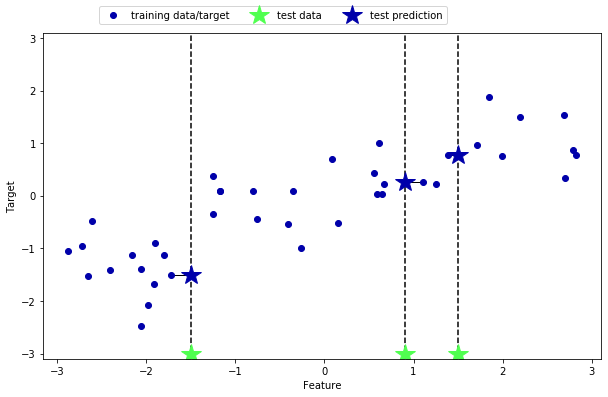

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=1)


Caso sejam utilizados mais de um vizinho, então a previsão será equivalente à média
dos vizinhos relevantes para cada ponto, conforme demonstrado abaixo:

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=3)




Para realizar uma regressão supervisionada por meio do algorítimo Knn, fazemos uso da
função KNeighborsRegressor

In [20]:
X, y = mglearn.datasets.make_wave(n_samples=40)
from sklearn.neighbors import KNeighborsRegressor


Vamos usar a base *make_wave* para fazer esse procedimento. Inicialmente vamos dividir a base
em unidades de treinamento e teste

In [21]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Agora definir o modelo aplicando a quantidade de vizinhos a ser utilizada no procedimento:

In [22]:
reg = KNeighborsRegressor(n_neighbors=3)

Agora vamos usar a função fit para efetuar o ajuste do modelo:

In [23]:
reg.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Agora nós podemos fazer a previsão sobre a nossa base de teste, assim como especificado a seguir:

In [24]:
reg.predict(X_test)



array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

Nós podemos avaliar o modelo utilizando o método de escore para obter o score R². Esse
coeficiente varia de zero a um e serve como uma medida de o quão efetiva é a previsão feita.
Se o R² for igual a um, então a previsão é perfeita. já no caso em que ele é igual a zero,
a previsão é totalmente incorreta. Esse coeficiente é obtido por meio da função reg.score
assim como demonstrado a seguir.

In [25]:
reg.score(X_test, y_test)


0.8344172446249604

## Regressão Linear

A regressão linear mostra os parâmetros que minimizam a soma dos resíduos quadráticos
entre a previsão e o verdadeiro *y* na base de treinamento. O código abaixo demonstra como
proceder com o pacote sklearn. Para tanto, será utilizada a função LinearRegression

In [27]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: %s" % lr.coef_)
print("lr.intercept_: %s" % lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


Vejamos o desempenho do conjunto de treinamento e do conjunto de testes

In [28]:
print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.670089
test set score: 0.659337


A estatística R² foi igual a 0,66 indicando que o ajuste da previsão não é muito bom.

***Outro exemplo***  
Vamos utilizar a base de dados sobre habitação referente à cidade de Boston, a qual é formada por
506 observações e 105 características derivadas. Vamos carregar o conjunto de dados e o dividir em
um conjunto de treinamento e teste. Em seguida, vamos construir o modelo de regressão linear.


In [29]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.952052
test set score: 0.607472


Como o teste de escore para a base de treinamento é muito superior ao teste de escore da base de
teste, esse é um sinal de um problema de sobreajuste, o qual deve ser corrigido.
Uma alternativa para contornar esse problema é utilizar a regressão de Ridge em vez da regressão
linear tradicional.
